In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
my_palette = sns.color_palette("husl")
my_palette.pop(1)
sns.set_palette(sns.color_palette(my_palette))

## Automerge

In [39]:
swift_times = pd.read_csv("opt-swift-automerge.txt", header = None)

# these values are time for swift to run in nanoseconds when we add another point. 
# so the first element is the time taken to add the first point and the last element 
# is the time to add the 1000th point. it's not cumulative.

am_swift = swift_times.transpose()
am_swift = am_swift.rename(columns = {0 : 'Time'})

# Convert to milliseconds to match other file
conversion = 0.0000010
am_swift['Time'] = am_swift['Time'].apply(lambda x: x * conversion)

def accumulate(df):
    cumulative = np.zeros(df.count())
    summed = 0
    for (index, row) in df.iterrows():
        summed += df.iloc[index]['Time']
        cumulative[index] = summed
    return cumulative
        
summed = accumulate(am_swift)
am_swift['Cumulative'] = summed

am_swift.head()

,Time,Cumulative
0,87.490485,87.490485
1,30.993843,118.484328
2,35.120957,153.605285
3,73.449933,227.055218
4,189.182291,416.237509


In [40]:
js_times = pd.read_csv("opt-js-automerge.txt", header = None)

# these values are time for javascript to run in Milliseconds when we add another point. 
# so the first element is the time taken to add the first point and the last element is the time 
# to add the 1000th point. it's not cumulative.           

am_javascript = js_times.transpose()
am_javascript = am_javascript.rename(columns = {0 : 'Time'})

summed = accumulate(am_javascript)
am_javascript['Cumulative'] = summed

am_javascript.head()

,Time,Cumulative
0,60,60.0
1,13,73.0
2,20,93.0
3,157,250.0
4,13,263.0


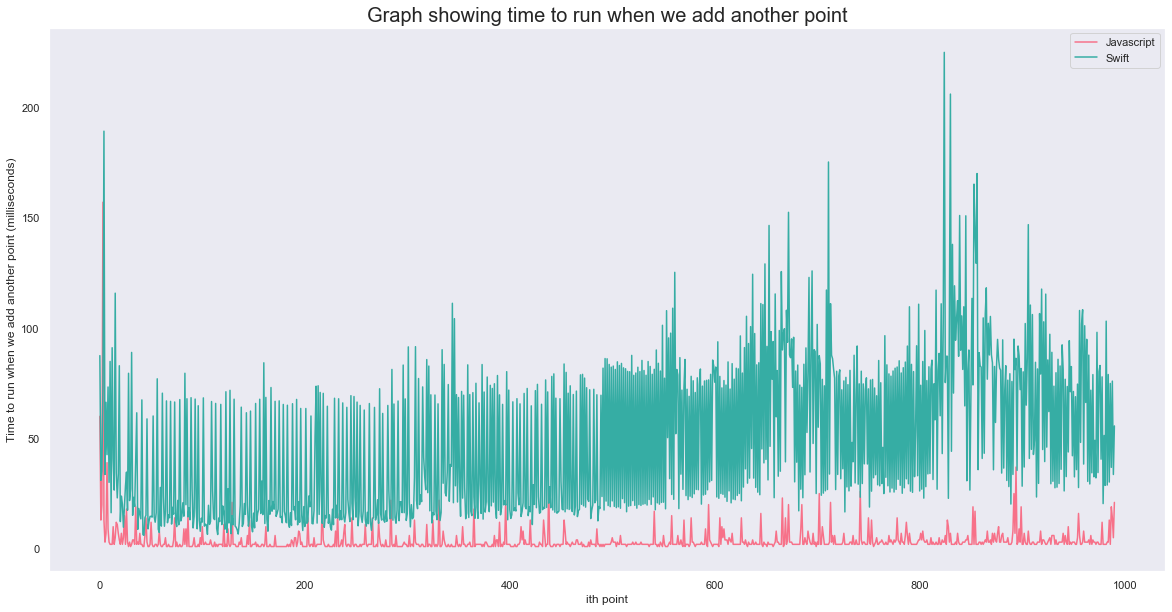

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.set_title('Graph showing time to run when we add another point', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (milliseconds)')
ax.plot(am_javascript.index.values, am_javascript['Time'], label = "Javascript", color = my_palette[0])
ax.plot(am_swift.index.values, am_swift['Time'], label = "Swift", color = my_palette[2])
ax.legend()
plt.show()

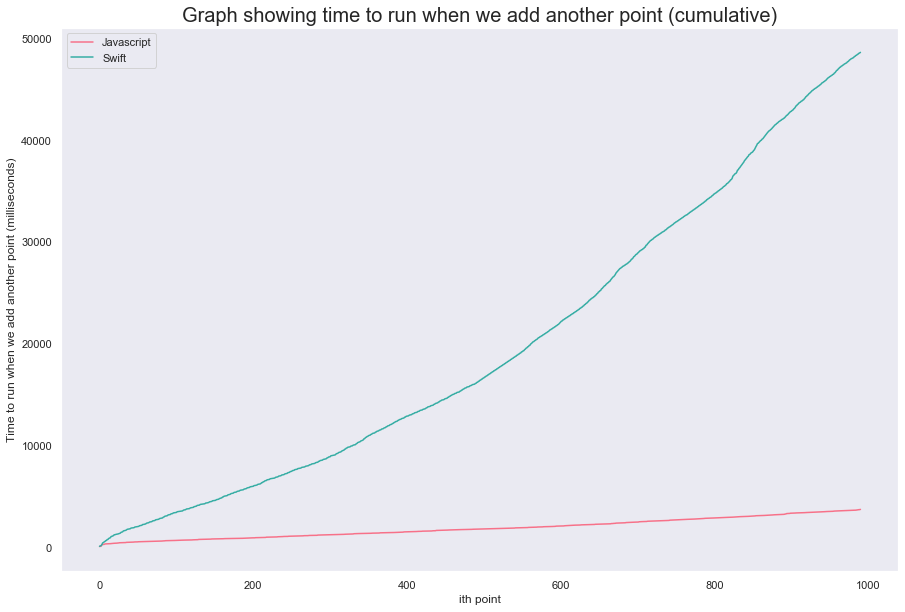

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing time to run when we add another point (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (milliseconds)')
ax.plot(am_javascript.index.values, am_javascript['Cumulative'], label = "Javascript", color = my_palette[0])
ax.plot(am_swift.index.values, am_swift['Cumulative'], label = "Swift", color = my_palette[2])
ax.legend()
plt.show()

In [22]:
# this is the length of the jsonified automerge document in chars, 
# it's cumulative and each element is the document with one extra point. 
# it looks pretty linear but you can see you add around 20 extra chars for each point.

automerge_length = pd.read_csv("opt-automerge.txt", header = None)

automerge = automerge_length.transpose()
automerge = automerge.rename(columns = {0 : 'Length'})

automerge.head()

,Length
0,148
1,164
2,180
3,196
4,212


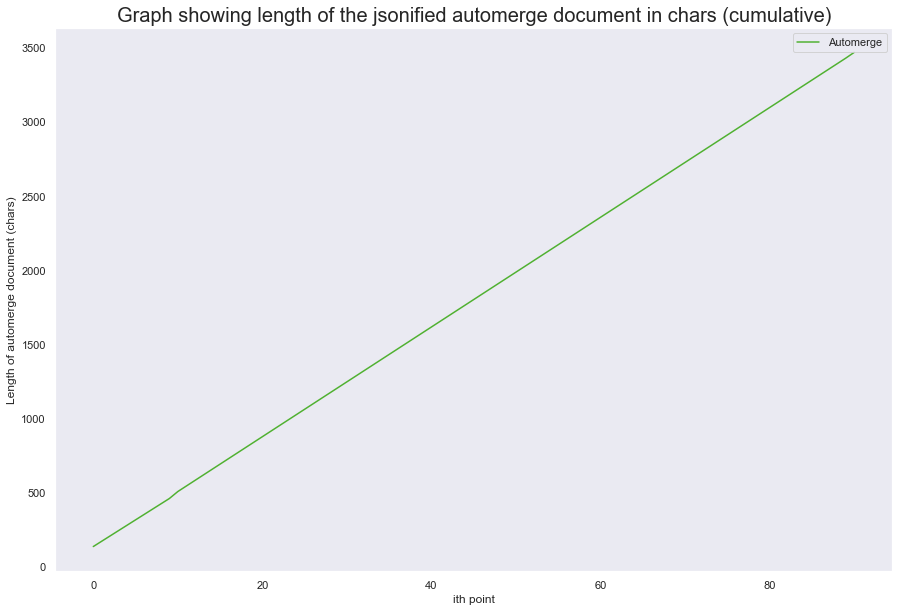

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing length of the jsonified automerge document in chars (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Length of automerge document (chars)')
ax.plot(automerge.index.values, automerge['Length'], label = "Automerge", color = my_palette[1])
ax.legend()
plt.show()

## YJS

In [24]:
swift_times_yjs = pd.read_csv("opt-swift-yjs.txt", header = None)

# these values are time for swift to run in nanoseconds when we add another point. 
# so the first element is the time taken to add the first point and the last element 
# is the time to add the 1000th point. it's not cumulative.

yjs_swift = swift_times_yjs.transpose()
yjs_swift = yjs_swift.rename(columns = {0 : 'Time'})

# Convert to milliseconds to match other file
conversion = 0.0000010
yjs_swift['Time'] = yjs_swift['Time'].apply(lambda x: x * conversion)

def accumulate(df):
    cumulative = np.zeros(df.count())
    summed = 0
    for (index, row) in df.iterrows():
        summed += df.iloc[index]['Time']
        cumulative[index] = summed
    return cumulative
        
summed = accumulate(yjs_swift)
yjs_swift['Cumulative'] = summed

yjs_swift.head()

,Time,Cumulative
0,61.448359,61.448359
1,35.093412,96.541771
2,46.615267,143.157038
3,57.875987,201.033025
4,83.068658,284.101683


In [25]:
js_times_yjs = pd.read_csv("opt-js-yjs.txt", header = None)

# these values are time for javascript to run in Milliseconds when we add another point. 
# so the first element is the time taken to add the first point and the last element is the time 
# to add the 1000th point. it's not cumulative.           

yjs_javascript = js_times_yjs.transpose()
yjs_javascript = yjs_javascript.rename(columns = {0 : 'Time'})

summed = accumulate(yjs_javascript)
yjs_javascript['Cumulative'] = summed

yjs_javascript.head()

,Time,Cumulative
0,6,6.0
1,3,9.0
2,2,11.0
3,4,15.0
4,6,21.0


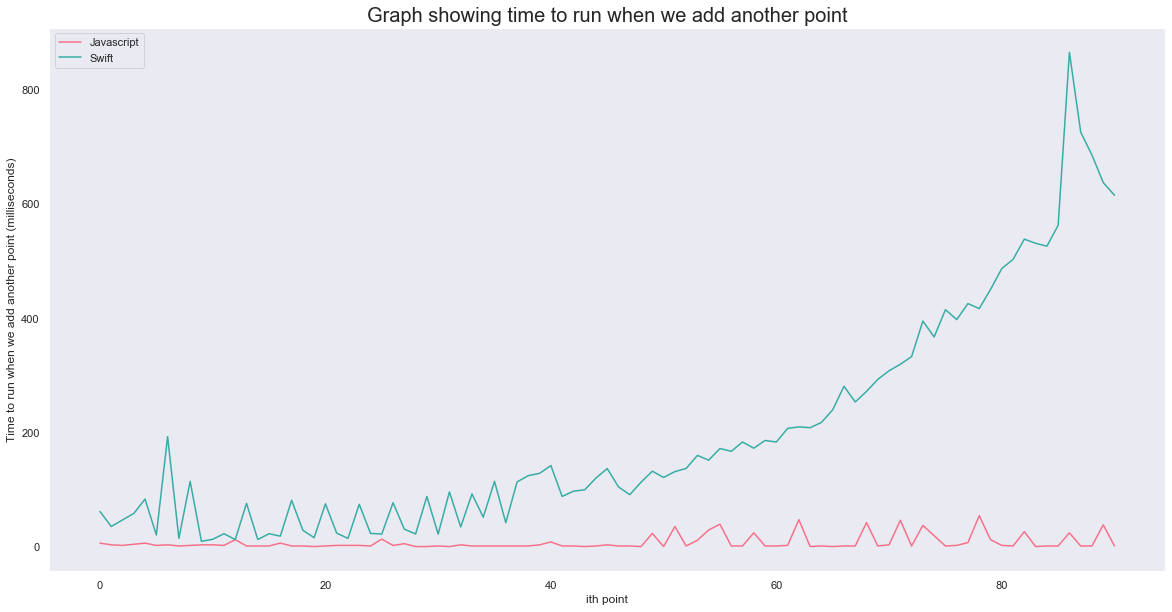

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.set_title('Graph showing time to run when we add another point', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (milliseconds)')
ax.plot(yjs_javascript.index.values, yjs_javascript['Time'], label = "Javascript", color = my_palette[0])
ax.plot(yjs_swift.index.values, yjs_swift['Time'], label = "Swift", color = my_palette[2])
ax.legend()
plt.show()

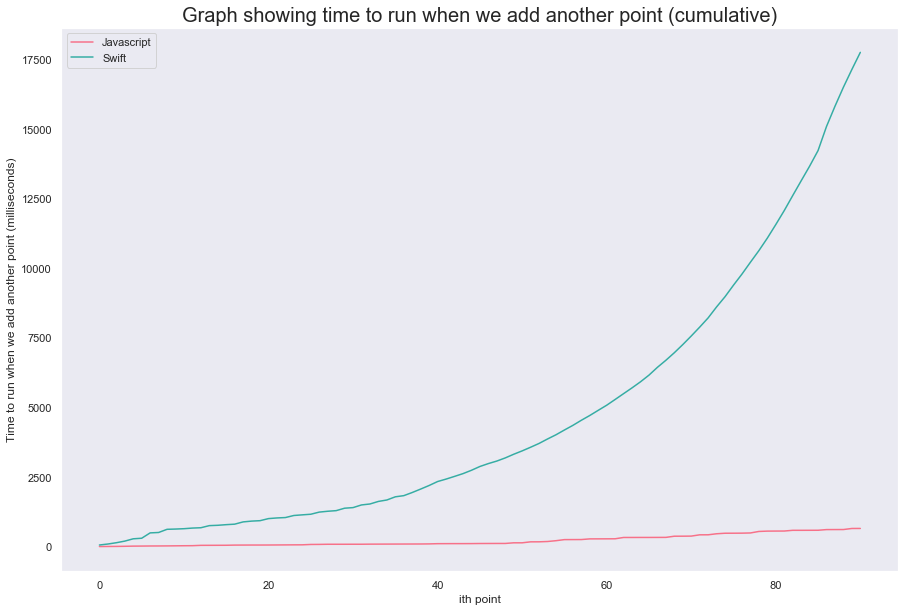

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing time to run when we add another point (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (milliseconds)')
ax.plot(yjs_javascript.index.values, yjs_javascript['Cumulative'], label = "Javascript", color = my_palette[0])
ax.plot(yjs_swift.index.values, yjs_swift['Cumulative'], label = "Swift", color = my_palette[2])
ax.legend()
plt.show()

In [28]:
# this is the length of the jsonified automerge document in chars, 
# it's cumulative and each element is the document with one extra point. 
# it looks pretty linear but you can see you add around 20 extra chars for each point.

automerge_length = pd.read_csv("opt-yjs.txt", header = None)

automerge = automerge_length.transpose()
automerge = automerge.rename(columns = {0 : 'Length'})

automerge.head()

,Length
0,136
1,172
2,208
3,244
4,280


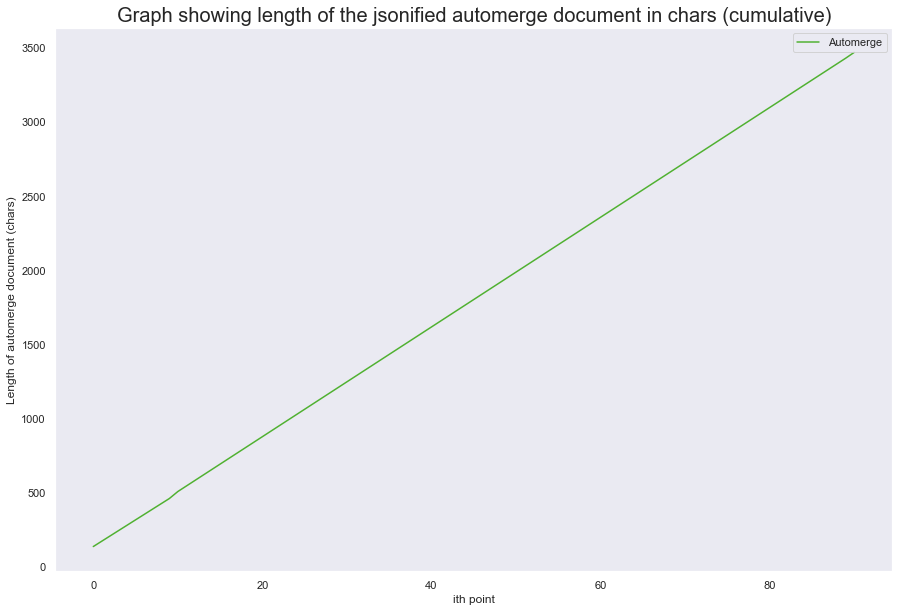

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing length of the jsonified automerge document in chars (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Length of automerge document (chars)')
ax.plot(automerge.index.values, automerge['Length'], label = "Automerge", color = my_palette[1])
ax.legend()
plt.show()

### Other

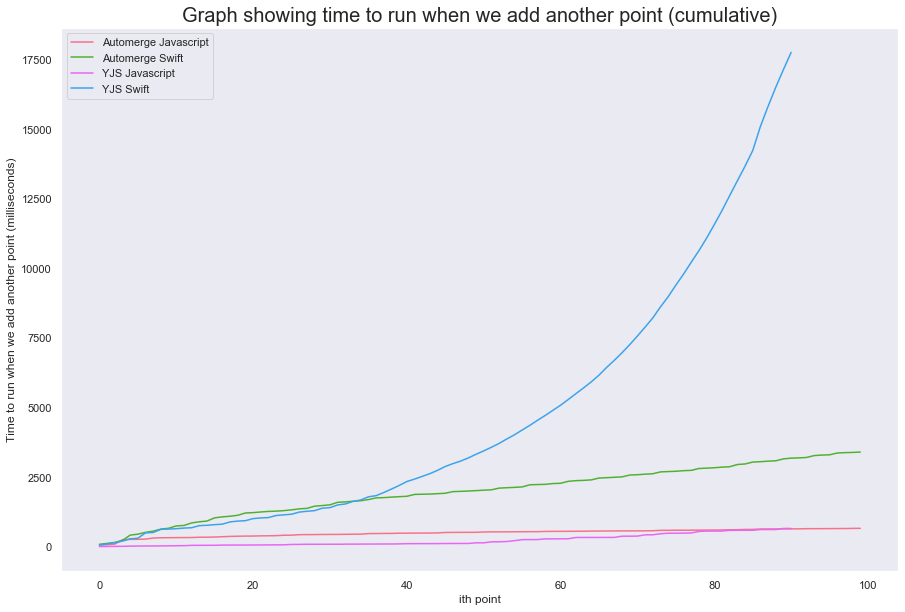

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing time to run when we add another point (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (milliseconds)')
ax.plot(am_javascript.index.values[:100], am_javascript['Cumulative'][:100], label = "Automerge Javascript", c=my_palette[0])
ax.plot(am_swift.index.values[:100], am_swift['Cumulative'][:100], label = "Automerge Swift", c=my_palette[1])
ax.plot(yjs_javascript.index.values, yjs_javascript['Cumulative'], label = "YJS Javascript", c=my_palette[4])
ax.plot(yjs_swift.index.values, yjs_swift['Cumulative'], label = "YJS Swift", c=my_palette[3])
ax.legend()
plt.show()

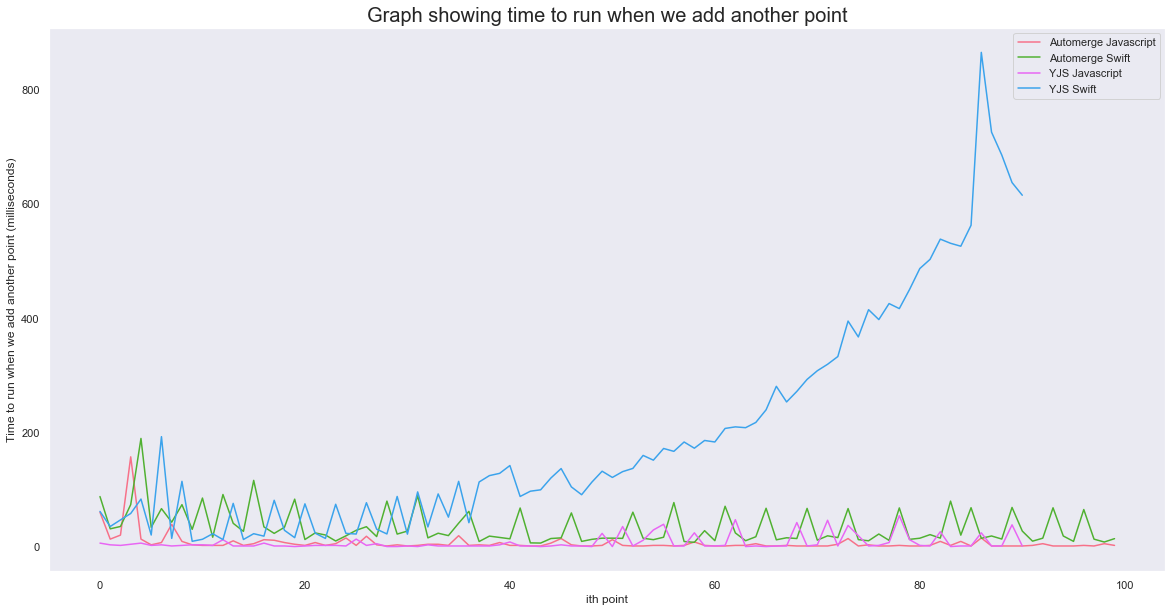

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.set_title('Graph showing time to run when we add another point', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (milliseconds)')
ax.plot(am_javascript.index.values[:100], am_javascript['Time'][:100], label = "Automerge Javascript", c=my_palette[0])
ax.plot(am_swift.index.values[:100], am_swift['Time'][:100], label = "Automerge Swift", c=my_palette[1])
ax.plot(yjs_javascript.index.values, yjs_javascript['Time'], label = "YJS Javascript", c=my_palette[4])
ax.plot(yjs_swift.index.values, yjs_swift['Time'], label = "YJS Swift", c=my_palette[3])
ax.legend()
plt.show()